# Data import, separating transactions conform financial power movement direction

Separation of the data will be performed using class ```TransactionHistory``` that contains fields ```user_in_swap_df``` and ```user_out_swap_df``` that represent movement directions.

In [116]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [141]:
class TransactionHistory:
    """
    Class that will separate transaction history by categories
    """
    def __init__(self):
        self.user_in_swap_df = None
        self.user_out_swap_df = None
        self.pool_investments_df = None
        self.pool_extractions_df = None
        self.pool_address = None
        
    
    def classify_history(self, transactions_df: pd.DataFrame):
        """
        Separate history in different dataframes conform transaction parameters
        (into 'in swaps', 'out swaps', investitions into pool and extraction of 
        funds from pool)
        
        Keyword arguments:
        transactions_df (pandas.DataFrame) -- dataframe with all transactions
            in given pool
        """
        self.pool_address = transactions_df['From'].mode()[0]
        
        group_df = transactions_df.groupby('Txhash').agg({
            'From': self.__contract_address_count__,
            'To': self.__contract_address_count__
        })
        
        swap_txhash_list = group_df[(group_df['From'] == 1) & (group_df['To'] == 1)].index.values

        self.user_in_swap_df = transactions_df[(transactions_df['Txhash'].isin(swap_txhash_list)) & (transactions_df['To'] == self.pool_address)]
        self.user_out_swap_df = transactions_df[(transactions_df['Txhash'].isin(swap_txhash_list)) & (transactions_df['From'] == self.pool_address)]
        
        
    def __contract_address_count__(self, s):
        """
        inner function that is used for counting directions of funds movement
        into/from pool address
        """
        return (s == self.pool_address).sum()

# WBTC/USDC

In [119]:
print(os.getcwd())

wbtc_df = pd.read_csv(os.getcwd() + "\stress_test_sim\WBTC-USDT_01-10_31-10.csv", index_col=False)

C:\workspace


In [120]:
print(wbtc_df['From'].mode()[0])
print(wbtc_df['To'].mode()[0])

0x99ac8ca7087fa4a2a1fb6357269965a2014abc35
0x99ac8ca7087fa4a2a1fb6357269965a2014abc35


In [121]:
wbtc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Txhash           5000 non-null   object
 1   UnixTimestamp    5000 non-null   int64 
 2   DateTime         5000 non-null   object
 3   From             5000 non-null   object
 4   To               5000 non-null   object
 5   Value            5000 non-null   object
 6   ContractAddress  5000 non-null   object
 7   TokenName        5000 non-null   object
 8   TokenSymbol      5000 non-null   object
dtypes: int64(1), object(8)
memory usage: 351.7+ KB


In [122]:
wbtc_df.tail(2)

,Txhash,UnixTimestamp,DateTime,From,To,Value,ContractAddress,TokenName,TokenSymbol
4998,0x30836673e6d9441e781070f04954d1f9ac00789842c7...,1634410035,2021-10-16 18:47:15,0x9799b475dec92bd99bbdd943013325c36157f383,0x99ac8ca7087fa4a2a1fb6357269965a2014abc35,"99,999.999999",0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USD Coin,USDC
4999,0xf6b35f2d967bc719e1055ac4cfa548d38fed149c1e4d...,1634410052,2021-10-16 18:47:32,0x99ac8ca7087fa4a2a1fb6357269965a2014abc35,0x1882a560d64475a7f237ced18643a4a3d48094cc,0.19690385,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,Wrapped BTC,WBTC


In [123]:
wbtc_df.Value = wbtc_df.Value.str.replace(",", "")
wbtc_df.Value = wbtc_df.Value.astype("float")

In [142]:
th = TransactionHistory()
th.classify_history(wbtc_df)

In [143]:
th.user_in_swap_df.head(2)

,Txhash,UnixTimestamp,DateTime,From,To,Value,ContractAddress,TokenName,TokenSymbol
1,0xfd5fa7fb8ec8d7befda639e20c6ac4e07eb5f066718c...,1633046598,2021-10-01 00:03:18,0x0000006daea1723962647b7e189d311d757fb793,0x99ac8ca7087fa4a2a1fb6357269965a2014abc35,149666.94434,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USD Coin,USDC
7,0x15b4a44e2d57f41fba173c2c3cecf056d038e7fde712...,1633049456,2021-10-01 00:50:56,0xee5c664626b53df6fd1b546efab3e3fb3dab8c4c,0x99ac8ca7087fa4a2a1fb6357269965a2014abc35,0.80000,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,Wrapped BTC,WBTC


In [144]:
th.user_in_swap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2203 entries, 1 to 4998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Txhash           2203 non-null   object 
 1   UnixTimestamp    2203 non-null   int64  
 2   DateTime         2203 non-null   object 
 3   From             2203 non-null   object 
 4   To               2203 non-null   object 
 5   Value            2203 non-null   float64
 6   ContractAddress  2203 non-null   object 
 7   TokenName        2203 non-null   object 
 8   TokenSymbol      2203 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 172.1+ KB


In [145]:
th.user_out_swap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2203 entries, 0 to 4997
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Txhash           2203 non-null   object 
 1   UnixTimestamp    2203 non-null   int64  
 2   DateTime         2203 non-null   object 
 3   From             2203 non-null   object 
 4   To               2203 non-null   object 
 5   Value            2203 non-null   float64
 6   ContractAddress  2203 non-null   object 
 7   TokenName        2203 non-null   object 
 8   TokenSymbol      2203 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 172.1+ KB


In [146]:
th.user_out_swap_df.head(2)

,Txhash,UnixTimestamp,DateTime,From,To,Value,ContractAddress,TokenName,TokenSymbol
0,0xfd5fa7fb8ec8d7befda639e20c6ac4e07eb5f066718c...,1633046598,2021-10-01 00:03:18,0x99ac8ca7087fa4a2a1fb6357269965a2014abc35,0x0000006daea1723962647b7e189d311d757fb793,3.411400,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,Wrapped BTC,WBTC
6,0x15b4a44e2d57f41fba173c2c3cecf056d038e7fde712...,1633049456,2021-10-01 00:50:56,0x99ac8ca7087fa4a2a1fb6357269965a2014abc35,0xee5c664626b53df6fd1b546efab3e3fb3dab8c4c,35063.212246,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USD Coin,USDC


# Plots that show properties of the distribution

In [147]:
print("least value in swapping in is = " + str(th.user_in_swap_df.Value.min()) + " and max value in swapping in is = " + str(th.user_in_swap_df.Value.max()))
print("least value in swapping out is = " + str(th.user_out_swap_df.Value.min()) + " and max value in swapping out is = " + str(th.user_out_swap_df.Value.max()))

least value in swapping in is = 0.00016166 and max value in swapping in is = 1350810.184816
least value in swapping out is = 0.00188231 and max value in swapping out is = 1007495.913772


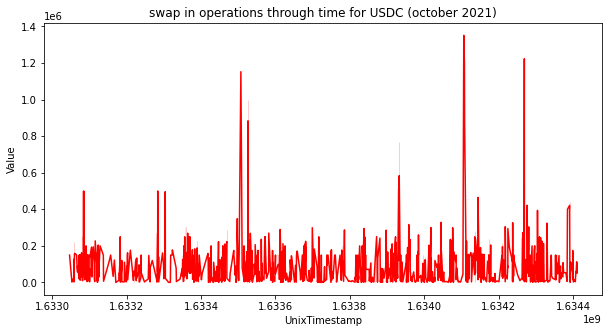

In [148]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=th.user_in_swap_df[th.user_in_swap_df.TokenSymbol == 'USDC'], 
    x="UnixTimestamp", y="Value", color="red"
).set_title("swap in operations through time for USDC (october 2021)")
plt.show()

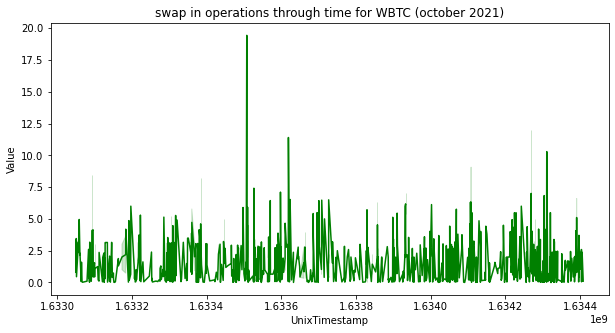

In [149]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=th.user_in_swap_df[th.user_in_swap_df.TokenSymbol == 'WBTC'], x="UnixTimestamp", y="Value", color='green').set_title("swap in operations through time for WBTC (october 2021)")
plt.show()

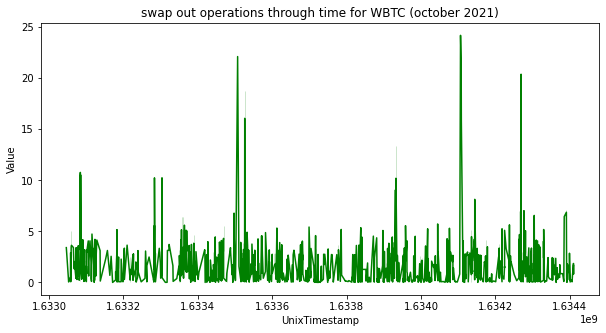

In [150]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=th.user_out_swap_df[th.user_out_swap_df.TokenSymbol == "WBTC"], x="UnixTimestamp", y="Value", color='green').set_title("swap out operations through time for WBTC (october 2021)")
plt.show()

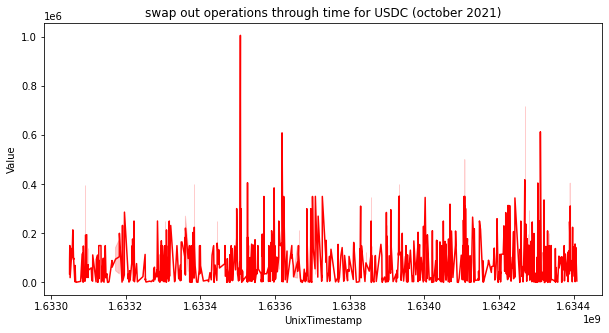

In [151]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=th.user_out_swap_df[th.user_out_swap_df.TokenSymbol == "USDC"], x="UnixTimestamp", y="Value", color='red').set_title("swap out operations through time for USDC (october 2021)")
plt.show()

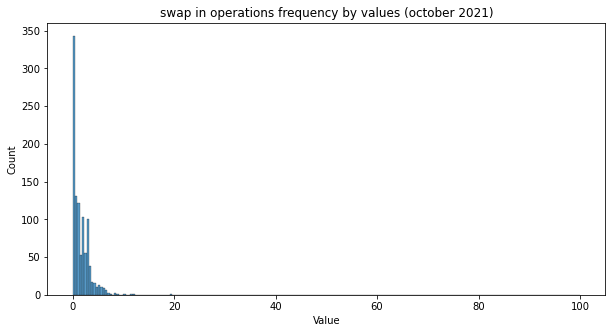

In [152]:
plt.figure(figsize=(10, 5))
sns.histplot(data=th.user_in_swap_df[th.user_in_swap_df["TokenSymbol"] == "WBTC"], x="Value", binrange=[0, 100]).set_title("swap in operations frequency by values (october 2021)")
plt.show()

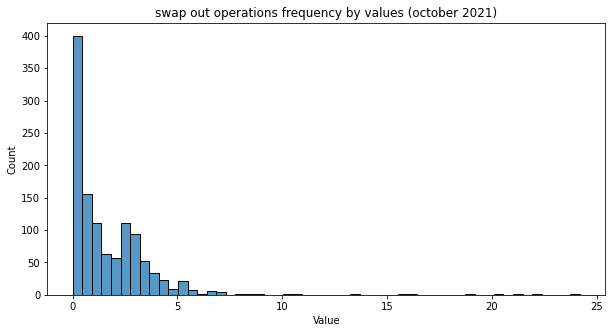

In [153]:
plt.figure(figsize=(10, 5))
sns.histplot(data=th.user_out_swap_df[th.user_out_swap_df["TokenSymbol"] == "WBTC"], x="Value").set_title("swap out operations frequency by values (october 2021)")
plt.show()

# Modifying scrypt for drawing plots with means for specific time intervals

In order to analyze efficiently transactions there is need in several distribution versions, where each will represent specific time-mean.

In [154]:
def show_transactions_distribution_moving_average(
    df: pd.DataFrame, 
    smaller_average: str, bigger_average: str, 
    plot_name: str, 
    x_size: int=15, y_size: int=9
):
    """
    draw distribution moving averages with smaller and bigger resolution

    Keyword arguments:
    df (pandas.DataFrame) -- transactions dataframe, where are present Unix 
        Timestamps as 'UnixTimestamp' and transaction values as 'Value'
    smaller_average (str) -- smaller window for finding average, accepts string with
        numerical identification of quantity and letter representing time metrics
        as 'h' for hours, 'd' for days and so on
    bigger_average (str) -- bigger window for finding average, accepts string with
        numerical identification of quantity and letter representing time metrics
        as 'h' for hours, 'd' for days and so on
    plot_name (str) -- name of plot
    x_size (int) -- size of x-axis (default 0)
    y_size (int) -- size of y-axis (default 0)
    """

    # set new timestamp for making average calculations without touching original dataset
    # form column with second resolution
    df_time = df.copy()
    df_time.UnixTimestamp = pd.to_datetime(df_time.UnixTimestamp, unit='s')

    # set timestamp as index and then resample conform both resolutions (smaller_average 
    # step and bigger_average step)
    df_time.index = df_time.UnixTimestamp
    df_time = df_time.resample(smaller_average).mean()
    df_avg_time = df_time.rolling(bigger_average).mean()

    # set size and set timeseries representation with automatic definition
    fig, ax = plt.subplots(figsize=(x_size, y_size))
    fig.autofmt_xdate()

    # plot information
    ax.plot_date(df_time.index, df_time.Value, linestyle='solid', marker=None, label=str('Moving ' + smaller_average + " average"))
    ax.plot_date(df_avg_time.index, df_avg_time.Value, linestyle='solid', marker=None, color='red', label=str('Moving ' + bigger_average + " average"))

    # set labels
    ax.set_xlabel("Time")
    ax.set_ylabel("Average transaction value per day")

    # set title and legend
    fig.suptitle(plot_name)
    fig.legend()


# Show moving averages

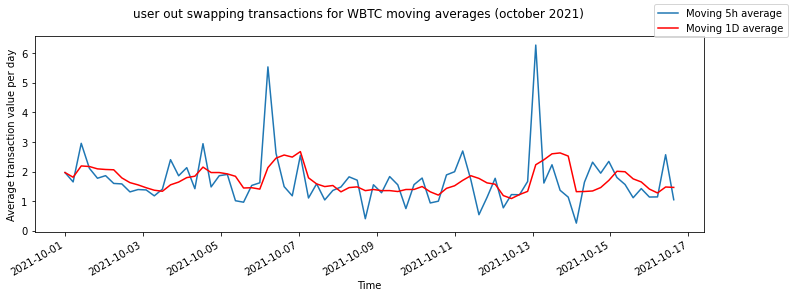

In [155]:
show_transactions_distribution_moving_average(
    th.user_out_swap_df[th.user_out_swap_df.TokenSymbol == 'WBTC'], 
    smaller_average='5h', bigger_average='1D',
    plot_name='user out swapping transactions for WBTC moving averages (october 2021)',
    x_size=12, y_size=4
)

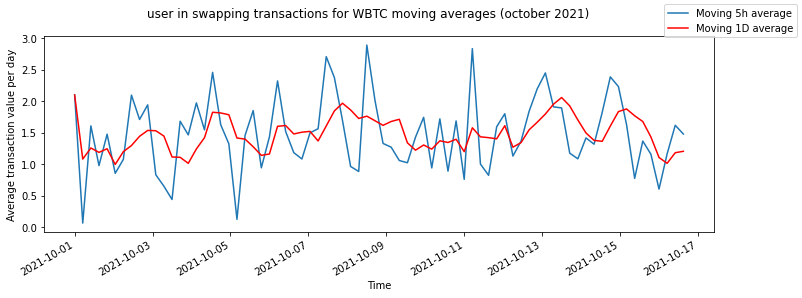

In [156]:
show_transactions_distribution_moving_average(
    th.user_in_swap_df[th.user_in_swap_df.TokenSymbol == 'WBTC'], 
    smaller_average='5h', bigger_average='1D',
    plot_name='user in swapping transactions for WBTC moving averages (october 2021)',
    x_size=12, y_size=4
)

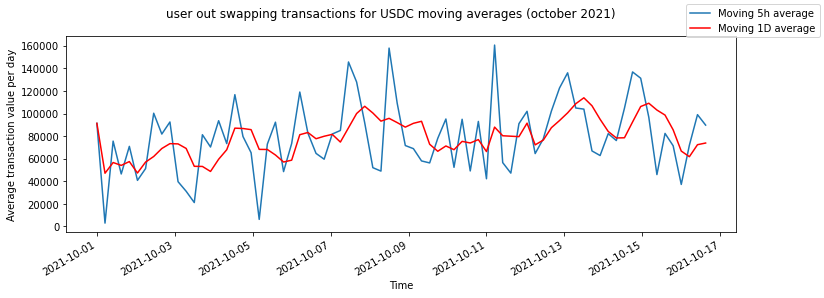

In [157]:
show_transactions_distribution_moving_average(
    th.user_out_swap_df[th.user_out_swap_df.TokenSymbol == 'USDC'], 
    smaller_average='5h', bigger_average='1D',
    plot_name='user out swapping transactions for USDC moving averages (october 2021)',
    x_size=12, y_size=4
)

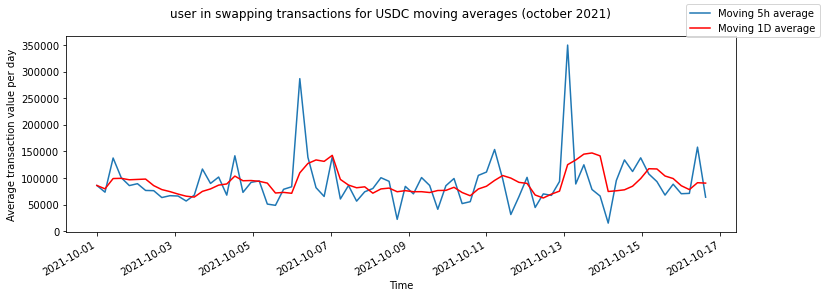

In [158]:
show_transactions_distribution_moving_average(
    th.user_in_swap_df[th.user_in_swap_df.TokenSymbol == 'USDC'], 
    smaller_average='5h', bigger_average='1D',
    plot_name='user in swapping transactions for USDC moving averages (october 2021)',
    x_size=12, y_size=4
)